## Задание 1
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X.shape

(442, 10)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def deriv(y, z):
    return 2*(y - z)

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
        else:
            # Получим ответы на текущей композиции
            pred = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, deriv(y_train, pred))
            

        trees.append(tree)
        
    return trees

In [10]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

In [11]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    train_squared_error = mean_squared_error(y_train, train_prediction)
    
    test_squared_error = mean_squared_error(y_test, test_prediction)

    return train_prediction, test_prediction, train_squared_error, test_squared_error

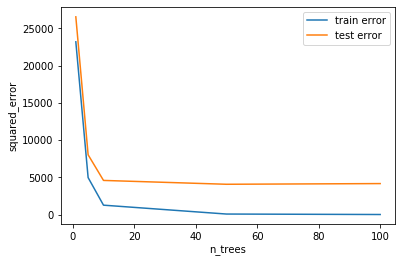

In [12]:
n_trees = [1, 5, 10, 50, 100]
eta = 0.1
max_depth = 5


train_squared_error_list = []
test_squared_error_list = []

for i in n_trees:
    coefs = [1] * i
    trees = gb_fit(i, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_squared_error, test_squared_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)[2:]
    train_squared_error_list.append(train_squared_error)
    test_squared_error_list.append(test_squared_error)
    
    
plt.xlabel('n_trees')
plt.ylabel('squared_error')
plt.plot(n_trees, train_squared_error_list, label='train error')
plt.plot(n_trees, test_squared_error_list, label='test error')
plt.legend(loc='upper right')
plt.show()

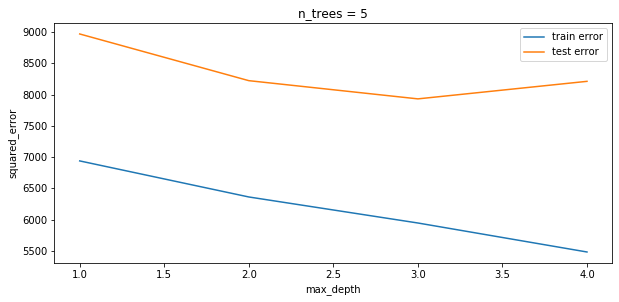

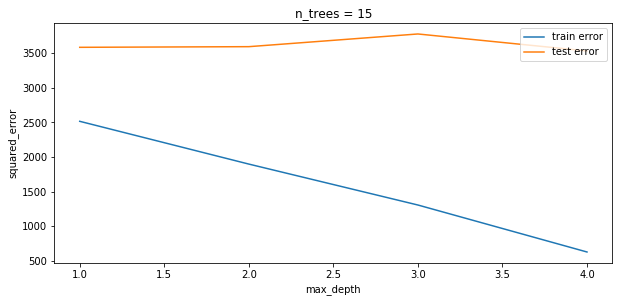

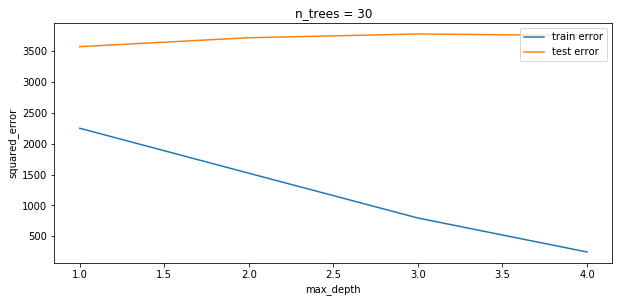

In [13]:
plt.figure(figsize = (10, 15))
n_trees = 5
coefs = [1] * n_trees
eta = 0.1
max_depth = [1, 2, 3, 4]

train_squared_error_list = []
test_squared_error_list = []

for i in max_depth:
    
    trees = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    train_squared_error, test_squared_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)[2:]
    train_squared_error_list.append(train_squared_error)
    test_squared_error_list.append(test_squared_error)
    
plt.subplot(3,1,1)    
plt.xlabel('max_depth')
plt.ylabel('squared_error')
plt.plot(max_depth, train_squared_error_list, label='train error')
plt.plot(max_depth, test_squared_error_list, label='test error')
plt.title('n_trees = 5');
plt.legend(loc='upper right')
plt.show()

n_trees = 15
coefs = [1] * n_trees
eta = 0.185
max_depth = [1, 2, 3, 4]

train_squared_error_list = []
test_squared_error_list = []

for i in max_depth:
    
    trees = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    train_squared_error, test_squared_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)[2:]
    train_squared_error_list.append(train_squared_error)
    test_squared_error_list.append(test_squared_error)
plt.figure(figsize = (10, 15))    
plt.subplot(3,1,2)     
plt.xlabel('max_depth')
plt.ylabel('squared_error')
plt.plot(max_depth, train_squared_error_list, label='train error')
plt.plot(max_depth, test_squared_error_list, label='test error')
plt.legend(loc='upper right')
plt.title('n_trees = 15');
plt.show()

n_trees = 30
coefs = [1] * n_trees
eta = 0.185
max_depth = [1, 2, 3, 4]

train_squared_error_list = []
test_squared_error_list = []

for i in max_depth:
    
    trees = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    train_squared_error, test_squared_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)[2:]
    train_squared_error_list.append(train_squared_error)
    test_squared_error_list.append(test_squared_error)
plt.figure(figsize = (10, 15))    
plt.subplot(3,1,3)     
plt.xlabel('max_depth')
plt.ylabel('squared_error')
plt.plot(max_depth, train_squared_error_list, label='train error')
plt.plot(max_depth, test_squared_error_list, label='test error')
plt.title('n_trees = 30');
plt.legend(loc='upper right')
plt.show()

## Вывод

Сначала при увеличении числа деревьев ошибка уменьшается, но, при дальшейшем увеличении числа деревьев и глубины дерева идет переобучение модели. Ошибка тренировочных данных уменьшается, в то время как ошибка тестовых данных растет
